## Statistical Methods in Python For Rare Event Searches

*Summer Course at Canfranc Underground Laboratory (LSC) July 2019*

### Lecture III

## Confidence Intervals

*Author: Jose A. Hernando*, June 2019

*Instituto Galego de Altas Enerxías. Universidade de Santiago de Compostela, Spain.*

In [1]:
import time

print( ' Last Execution ', time.asctime())

 Last Execution  Wed Jul 10 10:09:33 2019


In [2]:
# general imports
%matplotlib inline
%reload_ext autoreload
%autoreload 2

# numpy and matplotlib
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats

# possible styles: ggplot (simplicity), bmh (scientify data), 
plt.style.context('seaborn-colorblind')


import htcore as htcore
import httoys as httoys
import htcint as htcint
import htcint_examples as htexam

# ploting images
from IPython.display import display, Image

----

## Introduction

Usually we indicate that a given parameters $\mu$ (i.e half-lifetime) has an upper limit at 90 % CL  (i.e. $1.07 \times 10^{26}$ y at 90 %CL is the resulto of KamLAND-Zen).

Sometimes we quote an interval for the parameter $\mu$ as a **confidence interval** (CI) with a **confidence level** (CL) range.

But what does it mean? In fact, it means very different things for a frequentist and a bayesian!

And... how are they computed?

---

## 1. Frequestist vs Bayesians

Again...

Frequentist talk about experiments in the same conditions. Bayesians talk about probabilities based on a prior knowledge or a 'reasonable' guess.

**Frequentist** say a CI **covers** the true value at a given $\beta$ CL. That means that if you repeat a large number of times, $m$, an experiment at for each one you obtain a CI $\{$CI$_i, \, i=1, \dots, m \}$, at least a fraction $\beta$ of the CIs cover the true value. 

A frequentist needs to provide a method to **construct the CI**.

**Bayesians** talk about **credible intervals** (CI), that is the probability that the true parameter is inside the CI is greather or equal to a $\beta$ probability. That sounds most like what you want, but unfortunately to get it, you need to do accept some assumptions or some 'reasonable' priors.


For a frequetinst a CI indicates the limit in wich a data $x$  is consider an *extreme* event ad a given CL.

But to indicate is $x$ is an *extreme* event, we need to **order** the events given $\mu$.

----

## 2. Classical frequentist CI

Given a measurement $x$ that is related with a unknown parameter $\mu$ via a known relation a pdf, $g(x | \mu)$, (i.e x is poisson distributed with mean $\mu$) How we can provide a frequentist CI?  (In the example, what is the interval of $\mu$ that covers the true $\mu$?)

Classical CI obtained using the **Neyman construction**. 

The construction is based in defining a region, $R_\mu$, or **confident belt** in the plane $(x, \mu)$ and the CI for a measurement $x_0$ is computed as the segment of that region with $x = x_0$.

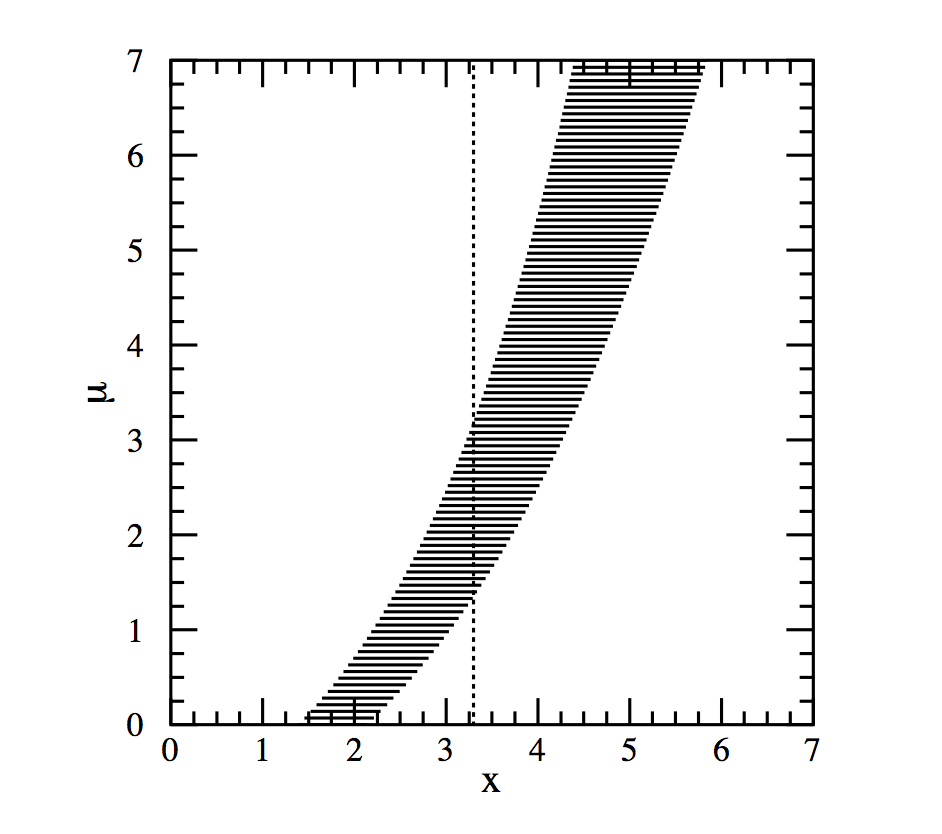

In [3]:
display(Image('figs/CI_belt.png',width=400))

We define the **confidence belt** scaning along the $\mu$ values and for each one, konwing the pdf $g(x \ \mu)$, computing the interval $[x_l(\mu), x_u(\mu)]$ that provides a $\beta$ % contaiment.

But we be construct three different interval: **lower, central and upper limit intervals**. 

The lower interval:
$$
\int_{-\infty}^{x_l(\mu)} g(x | \mu) \, \mathrm{d} x \le 1-\beta
$$

For the upper:
$$
\int_{x_u(\mu)}^{\infty} g(x | \mu) \, \mathrm{d} x \le 1-\beta
$$

And the central:
$$
\int_{x_l(\mu)}^{\infty} g(x | \mu) \, \mathrm{d}x, \;  \int_{-\infty}^{x_u(\mu)} f(x | \mu) \, \mathrm{d}x \le (1-\beta)/2 
$$

Notice that frequestist are **conservative** and $\beta$ CL implies at least $\beta$ CL. 


**Example**: Construct the *confident belt* CI at 90% and 68% CL considering a counting experiment with background $b$ and unknown signal $\mu$. 

In the case the pdf is a poisson con mean $b + \mu$. We scan along $\mu$ and for each $\mu$ we obtain the interval $[x_l(\mu), x_u(\mu)]$ at 90% contaiment. 

The we unify the border of the segments and we define the confident belt.

*Inspect the code in the following cells*

**Exercise**: Consider $b=0$ and a measurement $x_0 = 0$. What is the CI at 90% CL? And for $b=3$ and $x_0 = 1$?

In [4]:
def plt_rmu_classical(mu, b, beta = 0.90):
    alpha = (1-beta)/2
    rmu, xs = htcint.rmu(mu, b, beta, type = 'classical', full_output = True, )
    print('Rmu segment for b ', b, 'and mu ', mu, ' = ', rmu);
    cps, ps, ns = [xi[0] for xi in xs], [xi[1] for xi in xs], [xi[2] for xi in xs]
    plt.bar (ns[:15],  ps[:15], label = 'g(x| b + $\mu$)', alpha = 0.5);
    plt.plot(ns[:15], cps[:15], marker = 'o', color = 'green',  
             label = 'cdf(x| b + $\mu$)', alpha = 0.5);
    plt.plot((0, 15), (  alpha,   alpha), color = 'black', ls = '--');
    plt.plot((0, 15), (1-alpha, 1-alpha), color = 'black', ls = '--');
    plt.xlabel('$x$');
    plt.title('b = '+str(b)+', $\mu$ = '+str(mu)); plt.grid()
    plt.legend();
    return

Rmu segment for b  3.0 and mu  0.5  =  (2, 5)


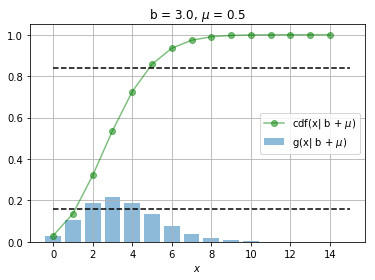

In [5]:
mu, b, beta = 0.5, 3., 0.68
plt_rmu_classical(mu, b, beta)

In [6]:
def plt_confbelt(x0, b, beta1 = 0.90, beta2 = 0.68, type = 'classical',
                 mumax = 12, musize=200):
    """ draws the CI confident belt for beta1 and beta2 CL of type = ('classical', 'fc')
        draws a line in the confident belt plane for x0 and print the ci for beta1 and beta2
        beta1 = 90 %CL and beta2 = 68% CL
    """
    mus = np.linspace(0., mumax, musize)
    xls, xus, ci1 = htcint.ci_belt(mus, b, beta1, type = type)
    plt.fill_betweenx(mus, xls, xus, color = 'cyan', alpha = 0.5, 
                      label = str(int(100*beta1))+'% CL');
    xls, xus, ci2 = htcint.ci_belt(mus, b, beta2, type = type)
    plt.fill_betweenx(mus, xls, xus, color = 'blue', alpha = 0.5, 
                      label = str(int(100*beta2))+'% CL' );
    plt.plot((x0 + 0.5, x0 + 0.5), (0, mumax), color = 'black', ls = '--')
    plt.xlabel('$x$'); plt.ylabel('$\mu$'); plt.title(type); plt.grid(); plt.legend()
    print('CI ', ci1(x0), ' at ', beta1, 'CL for b = ', b, ' and x0 = ', x0)
    print('CI ', ci2(x0), ' at ', beta2, 'CL for b = ', b, ' and x0 = ', x0)
    return ci1, ci2

CI  (0.0, 1.6884422110552764)  at  0.9 CL for b =  3  and x0 =  1
CI  (0.0, 0.24120603015075376)  at  0.68 CL for b =  3  and x0 =  1


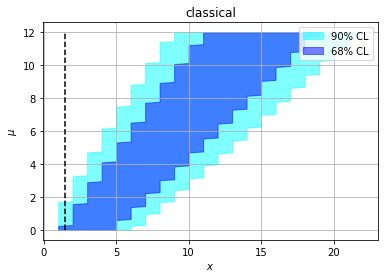

In [7]:
x0, b = 1, 3
plt_confbelt(x0, b, type = 'classical', mumax = 12, musize = 200);

**Exercise**: Test the coverange of the CI at 90 % CL in the previous example. Consider $b=2$ and $\mu_{true} = 2$.

-----

## 3. Feldmann-Cousins (FC) CI

Felmann and Cousins, when working on 90's on the NOMAD experiment, found several worrisome issues with classical CIs.

And they proposed an ordering principle to compute the extreme of a data, $x$, with respect $\mu$ based on the likelihood ratio.

This ordering principle avoid the decision of lower, central and upper integrals. It passes smoothly from one to another.

Now is the common method used to define CI. It is the new-classical.



Historically, Felmann and Cousins, encountered:

First, one have the temptation of quoting a **flip-flop** result: if we do not observe a signal, we quote a 90% CL, if we get an observation, we quote a 90% central CI.  Your present your result depending on your data.

The change from lower to central is not continuous in the confident belt region and have not the proper coverage. Now, the published result will depend on the measurement. 

We should decide what type of quote, before obtaining the measurement. 

Second, **there is no CI at 90% CL for the case $b=3$ and $x_0= 0$**. Imagine that NOMAD expecting 3 background events, see no signal, and have no result to quote!

They propose a construction interval method (**Feldman-Causins** method) [4] that smooth passes from lower to central intervals and avoid the problem of the no CI observed at $b=3, x_0 = 0$.

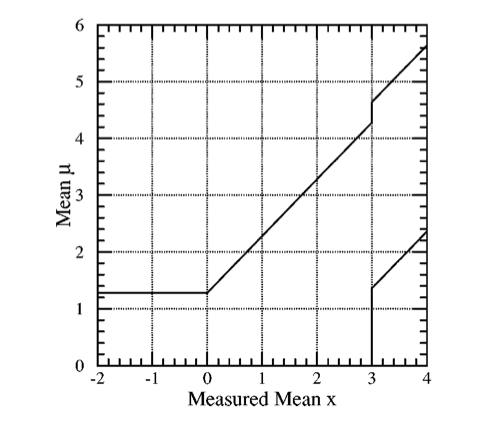

In [8]:
display(Image('figs/CI_FC_flipflop.png',width=400))

**Exercise**: Verify that the flip-flop problem has not the proper coverage
    
**Question**: Why the case $b=3$ and $x_0 = 0$ has no classical CI at 90% CL?

FC proposed an **ordering rule**, with respect the likelihood of the best estimate $\hat{\mu}(x)$ for a measurement $x$.

$$
t_\mu(x) =  \frac{\mathcal{L}( x | \mu)}{ \mathcal{L}(x | \hat{\mu}(x))}
$$

After reordering the $x$ values for a given $\mu$ with respect $t_\mu(x)$, we sum the probabilities, $g(x|\mu)$, starting from $x$ with the highest $t_\mu(x)$ till to reach the $\beta$ CL condition.

The ordering is based in the comparison of the likelihood, $\mathcal{L}(x|\mu)$,  of $\mu$ given a measurement $x$ for which best estimate is $\hat{\mu}(x)$, with the likelihood $\mathcal{L}(x|\hat{\mu}(x))$. 

We order $x$ with the comparision of the best-estimate $\hat{\mu}(x)$ with respect $\mu$.

A given $x$ may have a small likelihood, $\mathcal{L}(x | \mu)$, but if $\mathcal{L}(x | \hat{\mu}(x))$ is also small, then it boosts $t_\mu(x)$, and $x$ can gain priority respect other $x$'s values for the same $\mu$.

Notice that here there is no central, no lower or upper segment. The ordering decides a **unique interval**.

**Example**: Consider the case of $b=2$ and $\mu = 0.5$, constract the segment along $x$ of the FC confident belt at 90 % CL.

First we estimate $\hat{\mu}(x)$ that is $x-b$, except for $x \le 2$, when it is $0$, as there  is no physical meaning of a negative signal. 

For each $x$ we compute $\hat{x}$ and then $g(x | \mu)$ and $g(x | \hat{\mu}(x))$ and its $t_\mu(x)$. 

Then we order the $x$ accordingly with $t_\mu(x)$.

We start constructing the segment, adding the size of each $x$, that is $g(x|\mu)$ starting from the $x$ with the higuest $t_\mu(x)$ till we reach or surpass 90%.

*Inspect the code in the next cells*

In [9]:
def plt_rmu_fc(mu, b, beta = 0.9):
    rmu, xs = htcint.rmu(mu, b, beta, type = 'fc', full_output = True)
    print('Rmu segment for b ', b, 'and mu ', mu, ' = ', rmu);
    tms, cps, ns = [xi[0] for xi in xs], [xi[1] for xi in xs], [xi[2] for xi in xs]
    ps = [cps[0]]; ps = ps + [cps[i]-cps[i-1] for i in range(1, len(ns))]
    ks = range(len(ns))
    plt.bar (ks[:15], tms[:15], label = '$t_{\mu}(x)$', alpha = 0.5);
    plt.bar (ks[:15],  ps[:15], label = '$g(x | b + \mu)$', alpha = 0.5);
    plt.plot(ks[:15], cps[:15], marker = 'o', color = 'green',  
             label = 'cdf(x| b + $\mu$)', alpha = 0.5);
    plt.plot((0, 15), (beta, beta), color = 'black', ls = '--');
    plt.xlabel('$x$'); 
    plt.xticks(ks[:15], labels = ns[:15])
    plt.title('b = '+str(b)+', $\mu$ = '+str(mu)); plt.grid()
    plt.legend();
    return

Rmu segment for b  3.0 and mu  0.5  =  (0, 6)


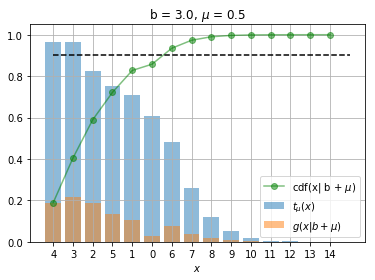

In [10]:
mu, b, beta = 0.5, 3., 0.90
plt_rmu_fc(mu, b, beta);

CI  (0.0, 1.8693467336683416)  at  0.9 CL for b =  3  and x0 =  1
CI  (0.0, 0.4221105527638191)  at  0.68 CL for b =  3  and x0 =  1


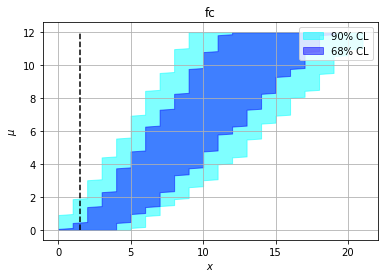

In [11]:
x0, b = 1, 3
plt_confbelt(x0, b, type = 'fc');

**Exercise**: FC is a frequentist method. Verify now that the FC contruction garantees **coverage** for some examples $b = 3, \mu_{true} = 0.5$.

**Exercise**: Compare the classical and frequentist interval, where they differ? where they are equal? Use the case for example $b=3$.

### FC confidence intervals in n-dimensions


The classical ordering is hard to extend to n-dimensions. But FC is not.

In this case $\mu$ is a vector. We will scan a region of the vector space, and for each point we will compute the $t_\mu(x)$ pdf, $g(t_\mu | \mu)$, and the p-value of the observed data $x_0$. We will select the space of $\mu$ wich p-values are greater than $1-\beta$ CL. 

In [12]:
## TODO - my drawing

p-value t0 : 0.183
(xl, xu) with tmu <= tmu0 : ( 0 ,  5 )


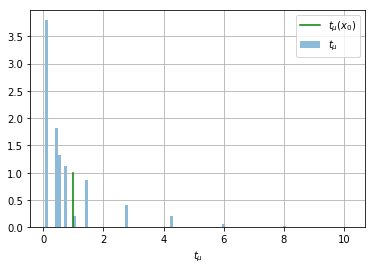

In [13]:
mu, mu0, x0, size = 0.5, 3., 0., 1000
htexam.plt_tmus(x0, stats.poisson, mu0 + mu, mu0, size);

---

## 4. Bayesian Credible Intervals

Bayesians provide a *credible integral* at a $\beta$ CL. The probability to find the true value inside the CI is $\beta$.

To obtain the CI, bayesians need the pdf $g(x | \mu)$, and  the prior probability of the relevant parameter, $\pi(\mu)$. In most cases, this prior is unknown, and they are forced to take a 'reasonable' prior. Using the Bayes' theorem we can compute the *posterior probability*:

$$
p(\mu | x) = \frac{g(x |\mu) \, \pi(\mu)}{p(x)}
$$

The denominator, is in fact the probiblitity to get $x$ for all posible hypotheses, $\mu$, that is:

$$
p(\mu | x) = \frac{g(x |\mu) \, \pi(\mu)}{\int g(x | \mu) \pi(\mu) \mathrm{d}\mu}
$$


### Example: low stats poisson

Consider the case of a counting experiment with $b$ background events ($b$ is known) and expect a signal $s$ on top. If one measures $n$, the posterior probability for $s$ is:

$$
p(b + s | n) = \frac{p(n | b + s) \,\pi(s)}{\int_s p(n | b+s) \pi(s)}
$$

To get the upper limit CI at $\beta$ CL, we integrate the posterior till the upper value, $s_u$, to get a total probability $\beta$.

$$
\int_{0}^{s_u} p(b + s | n)  = \beta
$$


We can take a 'reasonable' prior on $s$ (as a constant if $s>0$)
$$
\pi(s) = \left\{ \begin{array}{ll} 
1 & \mbox{if $s \ge 0$} \\
0 & \mbox{if $s \lt 0$}
\end{array} \right.
$$

The likelihood is
$$
p(n | b, s) = \frac{(b+s)^n e^{-(b+s)}}{n!} = \Gamma(b+s,n+1,1)
$$
where, $\Gamma(x, \alpha, \beta)$ is the gamma distribution. 

The case $b=0$, the denominator is 1, and the numerator, reduces to:
$$
\int_{0}^{s_u} \Gamma(s, n+1, 1) \mathrm{d}s = \beta
$$

For a value of $b$, we need to solve:
$$
\frac{\int_{0}^{s_u} \Gamma(b+s, n+1, 1) \mathrm{d}s}{\int_{0}^{\infty} \Gamma(b+s, n+1, 1) \mathrm{d}s} = \beta
$$
That can be computed with the change $u=s+b$.

**Example:** Compute the upper limit, $s_u$, using Bayes' CI at 90% CL for different values of $b$ and $n$ observations.

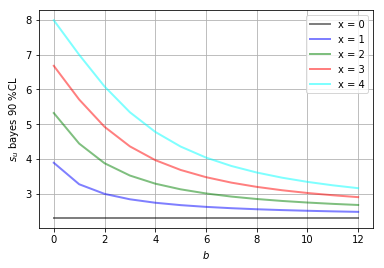

In [14]:
beta, ndim, nobs = 0.90, 13, 5
bs = np.arange(ndim)
ns = np.arange(nobs)

colors = 4*['black', 'blue', 'green', 'red', 'cyan']
for ni in ns:
    color = colors[ni]
    cbs = np.array([stats.gamma.cdf(bi, ni+1) for bi in bs])
    betaps = beta*(1-cbs)+cbs
    ss = np.array([stats.gamma.ppf(betapi, ni+1)-bi for bi, betapi in zip(bs, betaps)])
    plt.plot(bs, ss, color=color, lw=2, alpha=0.5, label=r'x = {:d}'.format(ni))
plt.xlabel(r'$b$'); plt.grid();
plt.ylabel(r'$s_u$ bayes {:d} %CL'.format(int(100*beta)));
plt.legend();